# 1.Basic Usage
Ref: https://networkx.org/documentation/latest/auto_examples/graphviz_drawing/plot_attributes.html

## 1.1 Creating a Basic Graph

Vertex set:  ['A', 'B', 'C', 'D', 'E']
Edge set:  [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'E')]
Info:  Graph with 5 nodes and 5 edges
Info:  Graph with 5 nodes and 5 edges
Node A has the following properties: Degree: 2



C:\Users\chath\AppData\Local\Temp\ipykernel_28112\3636159648.py:34: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print("Info: ", nx.info(G)) # Deprecated


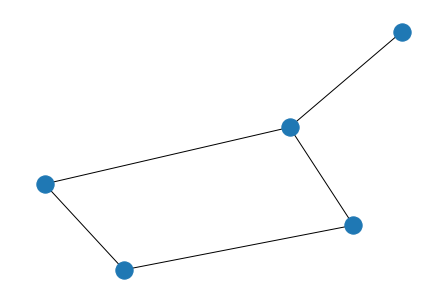

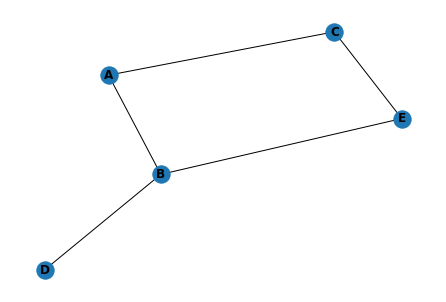

In [46]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Can also create graph with following:
# G = nx.Graph(incoming_graph_data), incoming_graph_data is the edges
#
# incoming_graph_data : input graph (optional, default: None)
#   Data to initialize graph. If None (default) an empty
#   graph is created.  The data can be any format that is supported
#   by the to_networkx_graph() function, currently including edge list,
#   dict of dicts, dict of lists, NetworkX graph, 2D NumPy array, SciPy
#   sparse matrix, or PyGraphviz graph.


# A node can be any hashable Python object except None.
# A hashable object is one that can be used as a key in a Python
# dictionary. This includes strings, numbers, tuples of strings
# and numbers, etc.

# On many platforms hashable items also include mutables such as
# NetworkX Graphs, though one should be careful that the hash
# doesn't change on mutables.
G.add_node("A")
G.add_nodes_from(["B","C","D","E"])

G.add_edge(*("A","B"))
G.add_edges_from([("A","C"), ("B","D"), ("B","E"), ("C", "E")])

print("Vertex set: ",G.nodes())
print("Edge set: ",G.edges())

print("Info: ", nx.info(G)) # Deprecated
print("Info: ", G)

n = "A"
print(f"Node {n} has the following properties: Degree: {G.degree(n)}\n")

nx.draw(G)  # calls nx.draw_networkx(...) internally
plt.show()

nx.draw(G, with_labels=True, font_weight="bold")  # calls nx.draw_networkx(...) internally
plt.show()

# plt.savefig(“graph.png”) 



[[1. 2.]
 [2. 1.]]


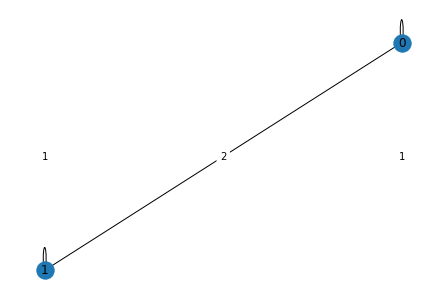

In [4]:
import numpy as np
import networkx as nx

A = np.array([[1, 1], [2, 1]])  # The numpy matrix is interpreted as an adjacency matrix for the graph.
G = nx.from_numpy_array(A)
nx.draw(G, with_labels=True)  # calls nx.draw_networkx(...) internally

edge_weight = nx.get_edge_attributes(G, "weight")
pos = nx.circular_layout(G)
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)

# TODO: How to print the adjancency matrix
print(nx.to_numpy_array(G))

## 1.2 Adding Node Data

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_node("A", attr1=100, attr2=50)
G.add_node("B")

# Use keywords to update specific node attributes for every node.

G.add_nodes_from(["C", "D"], size=10)
G.add_nodes_from(["E", "F"], weight=0.4)

# Use (node, attrdict) tuples to update attributes for specific nodes.

G.add_nodes_from([("P", dict(size=11)), ("Q", {"color": "blue"})])
print([(k, G.nodes[k]) for k in G.nodes])

H = nx.Graph()
H.add_nodes_from(G.nodes(data=True))  # Copy with node data
print([(k, H.nodes[k]) for k in G.nodes])

[('A', {'attr1': 100, 'attr2': 50}), ('B', {}), ('C', {'size': 10}), ('D', {'size': 10}), ('E', {'weight': 0.4}), ('F', {'weight': 0.4}), ('P', {'size': 11}), ('Q', {'color': 'blue'})]
[('A', {'attr1': 100, 'attr2': 50}), ('B', {}), ('C', {'size': 10}), ('D', {'size': 10}), ('E', {'weight': 0.4}), ('F', {'weight': 0.4}), ('P', {'size': 11}), ('Q', {'color': 'blue'})]


## 1.3 Adding Edge Data (weight)

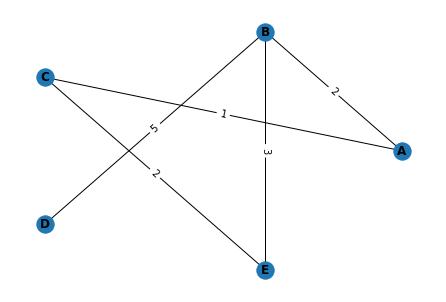

Edges from 'A' Data: {'B': {'weight': 2}, 'C': {'weight': 1}}
Edge Data: {'weight': 2}
Edges Data: [('A', 'B', {'weight': 2}), ('A', 'C', {'weight': 1}), ('B', 'D', {'weight': 5}), ('B', 'E', {'weight': 3}), ('C', 'E', {'weight': 2})]
Edges: [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'E')]
Nodes Data: [('A', {}), ('B', {}), ('C', {}), ('D', {}), ('E', {})]
Nodes: ['A', 'B', 'C', 'D', 'E']

Edge Data: {'weight': 2}
Node Data: {}

Edges: [('A', 'B'), ('A', 'C'), ('E', 'B'), ('E', 'C')]
Edges: [('A', 'B'), ('A', 'C')]


In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# Weighted graph
G = nx.Graph() 
E = [("A", "B", 2), ("A", "C", 1), ("B", "D", 5), ("B", "E", 3), ("C", "E", 2)]

G.add_weighted_edges_from(E)
pos = nx.circular_layout(G)

pos = nx.spring_layout(G)
pos = nx.spectral_layout(G)
pos = nx.spiral_layout(G)
pos = nx.shell_layout(G)
pos = nx.planar_layout(G)
pos = nx.random_layout(G)
pos = nx.circular_layout(G)

# pos is optional to nx.draw(...)
nx.draw(G, pos, with_labels=True, font_weight="bold")  # calls nx.draw_networkx(...) internally
edge_weight = nx.get_edge_attributes(G, "weight")


# edge_labels : dictionary (default=None)
#     Edge labels in a dictionary of labels keyed by edge two-tuple.
#     Only labels for the keys in the dictionary are drawn.
# *IM: pos is mandatory nx.draw_networkx_edge_labels(...)
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

print("Edges from 'A' Data:", G["A"])
print("Edge Data:", G["A"]["B"])
print("Edges Data:", G.edges(data=True))
print("Edges:", G.edges)
print("Nodes Data:", G.nodes(data=True))
print("Nodes:", G.nodes)
print()

# Note the difference between G.edges(...) vs G.edges[...]
print("Edge Data:", G.edges["A", "B"])
print("Node Data:", G.nodes["A"])
print()

print("Edges:", G.edges(["A", "E"]))  # only edges from these node
print("Edges:", G.edges(["A"]))  # only edges from node A


## 1.5 `NodeView` vs `NodeDataView`

Similar functionality with `EdgeView` vs `EdgeDataView`

In [26]:
# """A NodeView class to act as G.nodes for a NetworkX Graph

# Set operations act on the nodes without considering data.
# Iteration is over nodes. Node data can be looked up like a dict.
# Use NodeDataView to iterate over node data or to specify a data
# attribute for lookup. NodeDataView is created by calling the NodeView.

# Parameters
# ----------
# graph : NetworkX graph-like class

# Examples
# --------
G = nx.path_graph(3)
NV = G.nodes()  # or G.nodes(data=False)
# returns NodeView object
print("NV:", NV)  # [0, 1, 2]
print()

assert 2 in NV  # => true

for n in NV:  # => 0, 1, 2
    print("NV-loop:", n)
print()

assert NV & {1, 2, 3} == {1, 2}  # NV = [0, 1, 2]

G.add_node(2, color="blue")

# *IM: NV[2] is not 2, since [...] is overloaded in NodeView
print("NV[2]:", NV[2])  # => {'color': 'blue'}
print()
 
G.add_node(8, color="red")
NDV = G.nodes(data=True)  # returns NodeDataView object
print("NDV:", NDV)  # [(0, {}), (1, {}), (2, {'color': 'blue'}), (8, {'color': 'red'})]
print()

assert (2, NV[2]) in NDV  # => true
 
for n, dd in NDV:
    print((n, dd.get("color", "aqua")))  # default color is "aqua", if color is not set on a Node
    
# (0, 'aqua')
# (1, 'aqua')
# (2, 'blue')
# (8, 'red')
print()

# *IM: NDV[2] is not (2, {'color': 'blue'}), since [...] is overloaded in NodeDataView
# NDV[2] => {'color': 'blue'}
assert NDV[2] == NV[2]  # => true



# Assign default "aqua" if color is not set on a Node
NVdata = G.nodes(data="color", default="aqua")
print("NVdata:", NVdata)  # [(0, 'aqua'), (1, 'aqua'), (2, 'blue'), (8, 'red')]
print()

assert (2, NVdata[2]) in NVdata

for n, dd in NVdata:
    print((n, dd))
    
# (0, 'aqua')
# (1, 'aqua')
# (2, 'blue')
# (8, 'red')
print()

# *IM: NVdata[2] gets color => 'blue', NV[2] and NDV[2] gets data dictionary
# this is because, 
#   NDV = G.nodes(data=True)  # fetch datadict
#           => [(0, {}), (1, {}), (2, {'color': 'blue'}), (8, {'color': 'red'})]
#
#   NVdata = G.nodes(data="color", default="aqua")  # fetch the color attribute of node only
#           => [(0, 'aqua'), (1, 'aqua'), (2, 'blue'), (8, 'red')]
#
print("NVdata[2]:", NVdata[2]) 
print("NDV[2]:", NDV[2]) 
print("NV[2]:", NV[2]) 

assert not NVdata[2] == NV[2]  # NVdata gets 'color', NV gets datadict

NV: [0, 1, 2]

NV-loop: 0
NV-loop: 1
NV-loop: 2

NV[2]: {'color': 'blue'}

NDV: [(0, {}), (1, {}), (2, {'color': 'blue'}), (8, {'color': 'red'})]

(0, 'aqua')
(1, 'aqua')
(2, 'blue')
(8, 'red')

NVdata: [(0, 'aqua'), (1, 'aqua'), (2, 'blue'), (8, 'red')]

(0, 'aqua')
(1, 'aqua')
(2, 'blue')
(8, 'red')

NVdata[2]: blue
NDV[2]: {'color': 'blue'}
NV[2]: {'color': 'blue'}


## 1.5 Set Positions of Nodes

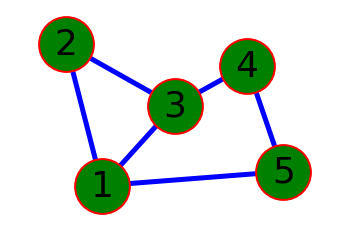

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for i in range(5): G.add_node(i+1)

G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)

# explicitly set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "green",
    "edgecolors": "red",
    "edge_color": "blue",
    "linewidths": 2,
    "width": 5,
}
nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.2)
plt.axis("off")
plt.show()

## 1.6 Set Positions of Nodes (Example 02)

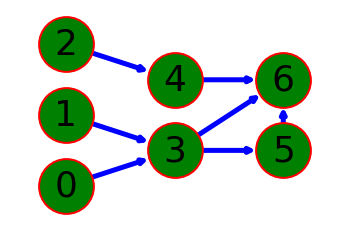

In [23]:
G = nx.DiGraph([(0, 3), (1, 3), (2, 4), (3, 5), (3, 6), (4, 6), (5, 6)])

# group nodes by column
left_nodes = [0, 1, 2]
middle_nodes = [3, 4]
right_nodes = [5, 6]

# set the position according to column (x-coord)
pos = {n: (0, i) for i, n in enumerate(left_nodes)}
pos.update({n: (1, i + 0.5) for i, n in enumerate(middle_nodes)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes)})

nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

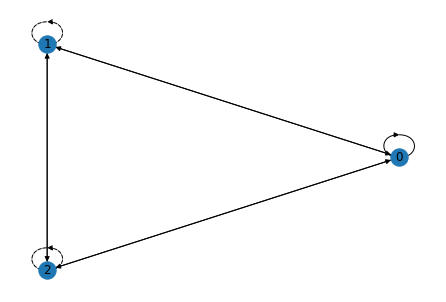

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph and add a self-loop to node 0
G = nx.complete_graph(3, create_using=nx.DiGraph)
G.add_edge(0, 0)
pos = nx.circular_layout(G)

# As of version 2.6, self-loops are drawn by default with the same styling as
# other edges
nx.draw(G, pos, with_labels=True)

# Add self-loops to the remaining nodes
edgelist = [(1, 1), (2, 2)]
G.add_edges_from(edgelist)

# Draw the newly added self-loops with different formatting
nx.draw_networkx_edges(G, pos, edgelist=edgelist, arrowstyle="<|-", style="dashed")

plt.show()

# 2.Graph Colors

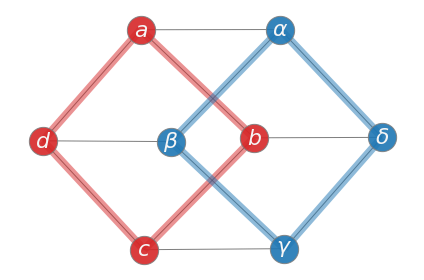

In [27]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.cubical_graph()
pos = nx.spring_layout(G, seed=3113794652)  # positions for all nodes

# nodes
options = {"edgecolors": "tab:gray", "node_size": 800, "alpha": 0.9}
nx.draw_networkx_nodes(G, pos, nodelist=[0, 1, 2, 3], node_color="tab:red", **options)
nx.draw_networkx_nodes(G, pos, nodelist=[4, 5, 6, 7], node_color="tab:blue", **options)

# edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[(0, 1), (1, 2), (2, 3), (3, 0)],
    width=8,
    alpha=0.5,
    edge_color="tab:red",
)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[(4, 5), (5, 6), (6, 7), (7, 4)],
    width=8,
    alpha=0.5,
    edge_color="tab:blue",
)


# some math labels
labels = {}
labels[0] = r"$a$"
labels[1] = r"$b$"
labels[2] = r"$c$"
labels[3] = r"$d$"
labels[4] = r"$\alpha$"
labels[5] = r"$\beta$"
labels[6] = r"$\gamma$"
labels[7] = r"$\delta$"
nx.draw_networkx_labels(G, pos, labels, font_size=22, font_color="whitesmoke")

plt.tight_layout()
plt.axis("off")
plt.show()

# 3.Graph Layouts

## 3.1 Simple Layouts

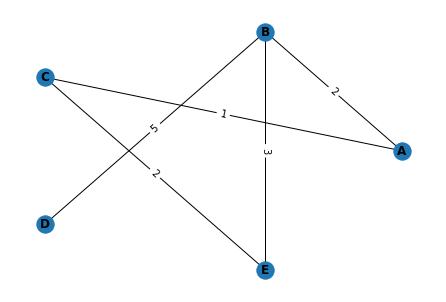

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

# Weighted graph
G = nx.Graph() 
E = [("A", "B", 2), ("A", "C", 1), ("B", "D", 5), ("B", "E", 3), ("C", "E", 2)]

G.add_weighted_edges_from(E)

pos = nx.spring_layout(G, seed=122145) # positions for all nodes - seed for reproducibility
pos = nx.spectral_layout(G)
pos = nx.spiral_layout(G)
pos = nx.shell_layout(G)
pos = nx.planar_layout(G)
pos = nx.random_layout(G)
pos = nx.circular_layout(G)

# pos is optional to nx.draw(...)
nx.draw(G, pos, with_labels=True, font_weight="bold")  # calls nx.draw_networkx(...) internally
edge_weight = nx.get_edge_attributes(G, "weight")

# edge_labels : dictionary (default=None)
#     Edge labels in a dictionary of labels keyed by edge two-tuple.
#     Only labels for the keys in the dictionary are drawn.
# *IM: pos is mandatory nx.draw_networkx_edge_labels(...)
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()


## 3.2 Multipartite Layout

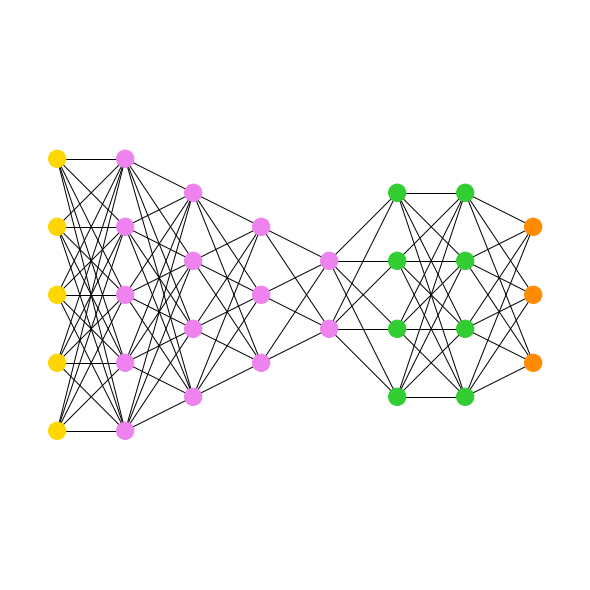

In [26]:
import itertools
import matplotlib.pyplot as plt
import networkx as nx

subset_sizes = [5, 5, 4, 3, 2, 4, 4, 3]
subset_color = [
    "gold",
    "violet",
    "violet",
    "violet",
    "violet",
    "limegreen",
    "limegreen",
    "darkorange",
]


def multilayered_graph(*subset_sizes):
    extents = nx.utils.pairwise(itertools.accumulate((0,) + subset_sizes))
    layers = [range(start, end) for start, end in extents]
    G = nx.Graph()
    for (i, layer) in enumerate(layers):
        G.add_nodes_from(layer, layer=i)
    for layer1, layer2 in nx.utils.pairwise(layers):
        G.add_edges_from(itertools.product(layer1, layer2))
    return G


G = multilayered_graph(*subset_sizes)
color = [subset_color[data["layer"]] for v, data in G.nodes(data=True)]
pos = nx.multipartite_layout(G, subset_key="layer")
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_color=color, with_labels=False)
plt.axis("equal")
plt.show()

## 3.2 Spectral Embedding

The spectral layout positions the nodes of the graph based on the eigenvectors of the graph Laplacian , `L = D - A `where `A` is the adjacency matrix and `D` is the degree matrix of the graph. By default, the spectral layout will embed the graph in two dimensions (you can embed your graph in other dimensions using the dim argument to either `draw_spectral()` or `spectral_layout()`).

When the edges of the graph represent similarity between the incident nodes, the spectral embedding will place highly similar nodes closer to one another than nodes which are less similar.

This is particularly striking when you spectrally embed a grid graph. In the full grid graph, the nodes in the center of the graph are pulled apart more than nodes on the periphery. As you remove internal nodes, this effect increases.

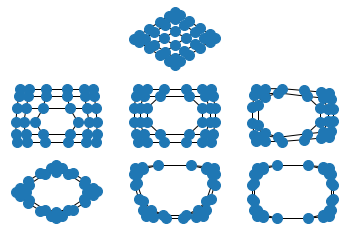

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx


options = {"node_color": "C0", "node_size": 100}

G = nx.grid_2d_graph(6, 6)
plt.subplot(332)
nx.draw_spectral(G, **options)

G.remove_edge((2, 2), (2, 3))
plt.subplot(334)
nx.draw_spectral(G, **options)

G.remove_edge((3, 2), (3, 3))
plt.subplot(335)
nx.draw_spectral(G, **options)

G.remove_edge((2, 2), (3, 2))
plt.subplot(336)
nx.draw_spectral(G, **options)

G.remove_edge((2, 3), (3, 3))
plt.subplot(337)
nx.draw_spectral(G, **options)

G.remove_edge((1, 2), (1, 3))
plt.subplot(338)
nx.draw_spectral(G, **options)

G.remove_edge((4, 2), (4, 3))
plt.subplot(339)
nx.draw_spectral(G, **options)

plt.show()

# 4.Graph Examples

## 4.1 Simple Path

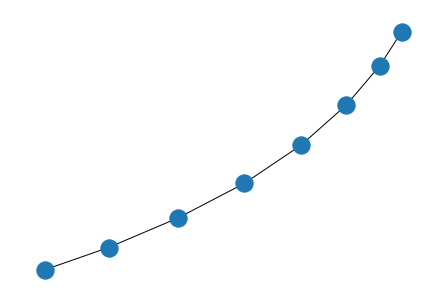

In [29]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.path_graph(8)
pos = nx.spring_layout(G, seed=47)  # Seed layout for reproducibility
nx.draw(G, pos=pos)
plt.show()

## 4.2 Weighted Graph

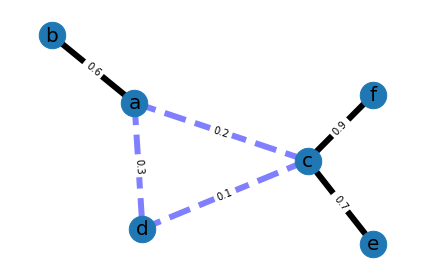

In [42]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()